In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
import pandas as pd
data = pd.read_csv('/Users/yena/Desktop/SCH/척척석사/연구 진행 및 분석 코드/약물전체추가/1.5/FINAL_약물전체추가(1:1.5).csv')
data = data.drop(columns=['등록번호'])
data.head()

,MFS,total_cci,키,몸무게,성별,나이,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,...,Cluster_O,Cluster_P,Cluster_Q,Cluster_R,Cluster_S,Cluster_T,Cluster_U,ADL_전문,ADL_위험,욕창_기동력
0,50.0,0.0,185.3,110.3,0,28.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,1.8,185.3,101.8,0,35.9,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,0.0,171.0,101.0,0,31.0,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,1.0,179.0,98.4,0,44.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70.0,0.0,169.1,97.0,0,44.9,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
x = data.drop(columns=['낙상유무'])
y = data['낙상유무']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=10)

In [4]:
model = RandomForestClassifier(random_state=10)
model.fit(x_train, y_train)

#predict probabilities
probs = model.predict_proba(x_test)

#keep probabilities for the positive outcome only
probs = probs[:,1]

In [5]:
# predict class values
y_test_pred = model.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, probs)
rf_f1, rf_auc = f1_score(y_test, y_test_pred), auc(rf_recall, rf_precision)

# summarize scores
print('RandomForest: f1 = %.3f auc = %.3f' % (rf_f1, rf_auc))

RandomForest: f1 = 0.960 auc = 0.993


In [6]:
print('roc_auc_score : ', roc_auc_score(y_test, y_test_pred))
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('precision_score : ' , precision_score(y_test, y_test_pred))
print('recall_score : ', recall_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

roc_auc_score :  0.9579588014981272
accuracy_score :  0.9530201342281879
precision_score :  0.9880952380952381
recall_score :  0.9325842696629213
f1_score :  0.9595375722543353


/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


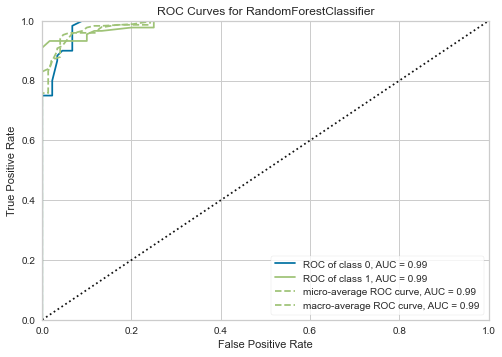

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [7]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, classes=[0,1])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [8]:
weight = model.feature_importances_
weight

weight2 = []

for i in range(0,len(x_train.columns)):
    weight2.append(weight[i])

#weight이 값을 시리즈에 저장
coeff = pd.Series(data= weight2 , index= x_train.columns)
sorted_values =  coeff.sort_values(ascending=False)    #coeff 를 내림차순으로 정렬해주세요
sorted_values

욕창_행동               0.233653
MFS                 0.084896
Cluster_S           0.061201
Cluster_H           0.053113
나이                  0.048533
ADL_배뇨, 배변          0.042080
Cluster_L           0.039011
몸무게                 0.038669
Cluster_F           0.037092
Cluster_D           0.037064
total_cci           0.036701
키                   0.033772
통증강도                0.031955
Cluster_I           0.029102
ADL_전문              0.027816
Cluster_G           0.023030
ADL_침상 밖으로 이동       0.018546
ADL_식사섭취            0.016040
Cluster_C           0.014191
욕창_영양               0.013972
욕창_기동력              0.009053
Cluster_M           0.007732
성별                  0.007684
ADL_체위변경            0.007336
Cluster_A           0.006982
Cluster_E           0.005340
Cluster_B           0.005238
호흡 간호_비침습적 산소 투여    0.005193
Cluster_R           0.004925
Cluster_U           0.004524
Cluster_O           0.003910
Cluster_J           0.003472
Cluster_N           0.003367
Cluster_T           0.002220
Cluster_P     

In [9]:
import eli5
from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(model, random_state=10).fit(x_train, y_train)
eli5.show_weights(model, top=len(x_train.columns), feature_names=x_test.columns.tolist())

Weight,Feature
0.2337 ± 0.3170,욕창_행동
0.0849 ± 0.1233,MFS
0.0612 ± 0.1013,Cluster_S
0.0531 ± 0.1072,Cluster_H
0.0485 ± 0.0674,나이
0.0421 ± 0.1189,"ADL_배뇨, 배변"
0.0390 ± 0.0858,Cluster_L
0.0387 ± 0.0429,몸무게
0.0371 ± 0.0878,Cluster_F
0.0371 ± 0.0733,Cluster_D


In [10]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print('tn, fp, fn, tp = ', tn, fp, fn, tp)


recall = tp/(tp + fn) # 민감도 또는 재현율
specificity = tn/(tn + fp) # 특이도
precision = tp/(tp+fp) # 정밀도, 양성예측도
minus = tn/(fn+tn)  # 음성예측도

print('양성예측도 = ', precision)
print('음성예측도 = ' ,minus)
print('민감도 = ', recall)
print('특이도 = ' ,specificity)

tn, fp, fn, tp =  59 1 6 83
양성예측도 =  0.9880952380952381
음성예측도 =  0.9076923076923077
민감도 =  0.9325842696629213
특이도 =  0.9833333333333333


In [11]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='f1', cv=10)
display_score(cross_val)

Score :  [0.93333333 0.94594595 0.95774648 0.95890411 0.93333333 0.94444444
 0.94285714 0.98591549 0.94444444 0.93150685]
Mean :  0.947843157509374
StandardDeviation :  0.01552233995543442


In [12]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=10)
display_score(cross_val)

Score :  [0.97395833 0.98611111 0.98784722 0.97627315 0.984375   0.98900463
 0.97797619 1.         0.99396135 0.96497585]
Mean :  0.9834482832988266
StandardDeviation :  0.009774321118412439


In [13]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10)
display_score(cross_val)


Score :  [0.91666667 0.93333333 0.95       0.95       0.91666667 0.93333333
 0.93220339 0.98305085 0.93220339 0.91525424]
Mean :  0.9362711864406779
StandardDeviation :  0.019560265262663898


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       358

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



In [15]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        60
           1       0.99      0.93      0.96        89

    accuracy                           0.95       149
   macro avg       0.95      0.96      0.95       149
weighted avg       0.96      0.95      0.95       149



In [32]:
test_non = pd.read_csv('/Users/yena/Desktop/SCH/척척석사/연구 진행 및 분석 코드/약물전체추가/예측활용데이터_비낙상.csv')
test_fall = pd.read_csv('/Users/yena/Desktop/SCH/척척석사/연구 진행 및 분석 코드/약물전체추가/예측활용데이터_낙상.csv')

test_non['낙상유무'] = 1
test_fall['낙상유무'] = 0
test = pd.concat((test_non, test_fall), axis=0)
test = test.replace('-',0)

test_x = test.drop(columns='낙상유무')
test_x = test_x.drop(columns='Unnamed: 0')
test_x = test_x.drop(columns='등록번호')
test_x = test_x.fillna(0)


test_y = test['낙상유무']


test_proba = model.predict_proba(test_x)
test_proba = pd.DataFrame(test_proba)




/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [33]:
len(test_non)

97

In [34]:
len(test_fall)

47

In [37]:
test_proba['낙상유무'] = 0
test_proba['낙상유무'].iloc[0:97] = 1
test_proba

/var/folders/bj/hzh5z8r11fz8jg3x13jvphq00000gn/T/ipykernel_7025/571939964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_proba['낙상유무'].iloc[0:97] = 1


,0,1,낙상유무
0,0.32,0.68,1
1,0.35,0.65,1
2,0.40,0.60,1
3,0.49,0.51,1
4,0.40,0.60,1
...,...,...,...
139,0.54,0.46,0
140,0.71,0.29,0
141,0.60,0.40,0
142,0.57,0.43,0


In [38]:
test_proba['낙상유무'].replace(0,'낙상').replace(1,'비낙상')
test_proba.to_csv('/Users/yena/Desktop/SCH/척척석사/연구 진행 및 분석 코드/약물전체추가/1.5/예측(RF로).csv')

In [39]:
print(classification_report(test_y, model.predict(test_x)))

              precision    recall  f1-score   support

           0       0.50      0.94      0.65        47
           1       0.95      0.55      0.69        97

    accuracy                           0.67       144
   macro avg       0.72      0.74      0.67       144
weighted avg       0.80      0.67      0.68       144



/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
